<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** José Jorge Degollado Maldonado, Osckar Valenzuela Cervantes

**Fecha:** 11 de marzo del 2023.

**Expediente** : 729299.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/jjdegmal/ProyectoConjunto_JDEGOLLADO_OVALENZUELA.git

# Tarea 4: Clase 9 y 10

### Ejercicio 1: (enunciado) Transcribirlo

### <font color ='red'> **Tarea 4 (parte 1)** 
    
Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

**Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

### <font color ='red'>Tarea 4 (parte 2)
Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$
    
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
Demuestre matemáticamente que 
$$P(k+1)=\frac{\lambda}{k+1}P(k)$$
y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

### Código de solución estudiante 1

### Parte 1

#### Generación de variable aleatoria continua:

Para generar muestras aleatorias que distribuyen según la función dada $F(x)$, podemos aplicar el método de la transformada inversa, que consiste en obtener la función inversa de la función de distribución acumulada $F^{-1}(u)$, donde $u$ es una variable aleatoria uniforme en el intervalo [0,1]. 

En este caso, la función de distribución acumulada $F(x)$ está dada por:

$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$

Para obtener su función inversa, podemos despejar $x$ de la ecuación y obtener:

$$x = \sin^2(\frac{\pi}{2}u)^2$$


<ipython-input-1-b3d6fa893cd9>:16: RuntimeWarning: divide by zero encountered in true_divide
  f = 2/np.pi/np.sqrt(x_grid*(1-x_grid))


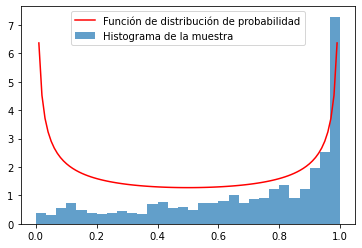

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función inversa de la distribución acumulada F(x)
def inv_F(u):
    return np.sin(np.pi/2*np.sqrt(u))**2

# Generar una muestra aleatoria de tamaño 1000
u = np.random.rand(1000)
x = inv_F(u)

# Graficar el histograma de la muestra generada
plt.hist(x, bins=30, density=True, alpha=0.7, label='Histograma de la muestra')

# Graficar la función de distribución de probabilidad f(x)
x_grid = np.linspace(0, 1, 100)
f = 2/np.pi/np.sqrt(x_grid*(1-x_grid))
plt.plot(x_grid, f, 'r', label='Función de distribución de probabilidad')
plt.legend()
plt.show()


#### Generación variable aleatoria Discreta

Para generar muestras aleatorias de la distribución binomial con parámetros $n=10$ y $p=0.7$ usando el método de la transformada inversa, primero encontramos la distribución de probabilidad acumulada $F_X(x)$:

$$X\sim binomial(n,p) \longrightarrow p_x=P(X=x)=\frac{n!}{x!(n-x)!}p^x(1-p)^{n-x},\quad x=0,1,\cdots,n$$

$$F(x)=\sum_{x=0}^{x}P(X=x)=\sum_{x=0}^{x}\frac{10!}{x!(10-x)!}(0.7)^x(0.3)^{10-x}$$


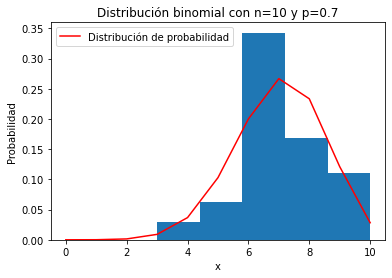

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Función de distribución acumulada (CDF)
def binom_cdf(x, n, p):
    cdf = 0
    for i in range(x+1):
        cdf += (np.math.factorial(n)/(np.math.factorial(i)*np.math.factorial(n-i))) * p**i * (1-p)**(n-i)
    return cdf

# Generación de muestras aleatorias
def binom_inv_transform(n, p, N):
    muestras = []
    for i in range(N):
        u = np.random.rand()
        x = 0
        while binom_cdf(x, n, p) < u:
            x += 1
        muestras.append(x)
    return muestras

# Parámetros de la distribución binomial
n = 10
p = 0.7

# Generación de 1000 muestras aleatorias
muestras = binom_inv_transform(n, p, 1000)

# Histograma de las muestras generadas
plt.hist(muestras, bins=5, density=True)

# Función de distribución de probabilidad (PDF)
x = np.arange(0, n+1, 1)
pmf = [(np.math.factorial(n)/(np.math.factorial(i)*np.math.factorial(n-i))) * p**i * (1-p)**(n-i) for i in x]
plt.plot(x, pmf, 'r-', label='Distribución de probabilidad')
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.title('Distribución binomial con n=10 y p=0.7')
plt.legend()
plt.show()


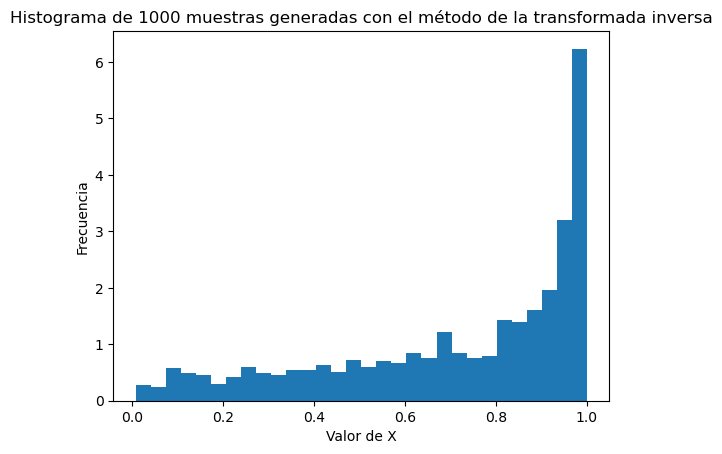

In [3]:
#Estudiante 2
import numpy as np
import matplotlib.pyplot as plt

def brownian_max_time_invCDF(u):
    # Función inversa de la CDF de la distribución del tiempo en que un movimiento browniano se mantiene sobre su punto máximo
    return np.sin(np.pi/2 * np.sqrt(u))**2

def brownian_max_time_rvs(n_samples):
    # Generar muestras uniformes
    U = np.random.uniform(size=n_samples)
    # Calcular muestras de la variable aleatoria X usando la función inversa de la CDF
    X = [brownian_max_time_invCDF(u) for u in U]
    return np.array(X)

# Ejemplo de uso:
n_samples = 1000
X = brownian_max_time_rvs(n_samples)

# Graficar el histograma de las muestras generadas
plt.hist(X, bins=30, density=True)
plt.xlabel('Valor de X')
plt.ylabel('Frecuencia')
plt.title('Histograma de 1000 muestras generadas con el método de la transformada inversa')
plt.show()


### Parte 2

In [ ]:
###

### Código de solución estudiante 2

### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........